In [304]:
!nvidia-smi

Mon Jul  3 07:13:05 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 L...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8               10W /  N/A|    864MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [305]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/05_auto_MPG/auto-mpg.csv")

# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#                 'Acceleration', 'Model Year', 'Origin']
# df = pd.read_csv(url, names=column_names,
#                  na_values='?', comment='\t',
#                  sep=' ', skipinitialspace=True)

In [306]:
print(df)
print(df.dtypes)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

In [307]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [308]:
# The horsepower column has missing value represented as "?"

df["horsepower"] = df["horsepower"].apply(lambda x: x.replace("?", "100"))
pd.to_numeric(df['horsepower'])

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [309]:
print(df.isna().sum())
print(df.dtypes)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


<ipython-input-310-cea13e4c66d9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

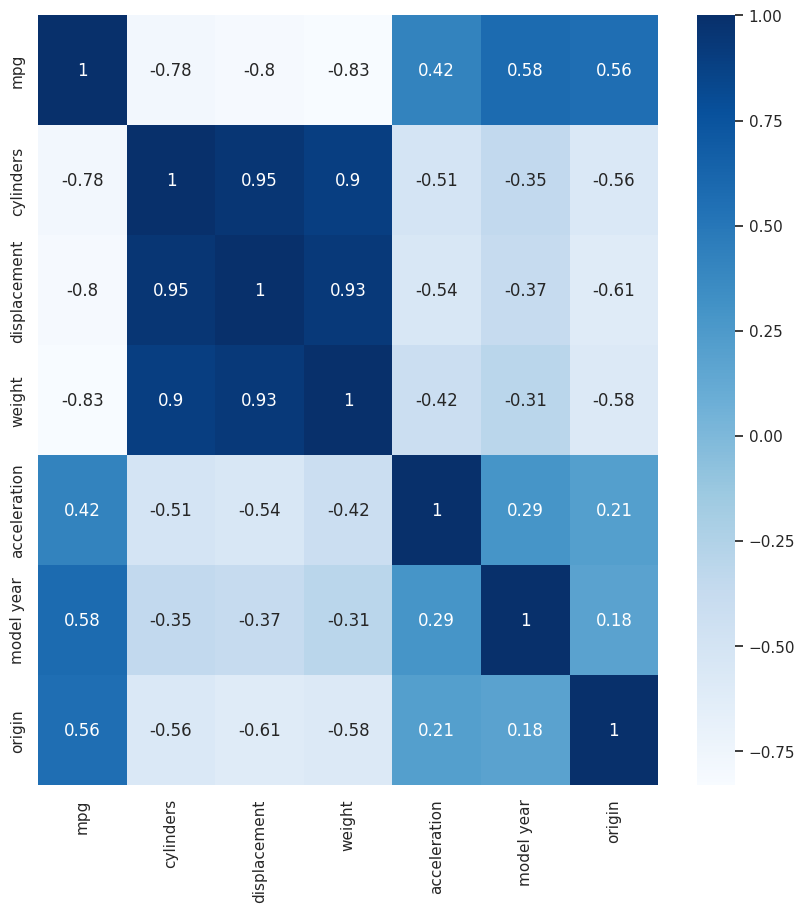

In [310]:
# Correlation analysis

import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

# heatmap to express correlation
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
sns.heatmap(correlation, annot = True, cbar = True, cmap="Blues")        # Blue, Blue, I love Blue

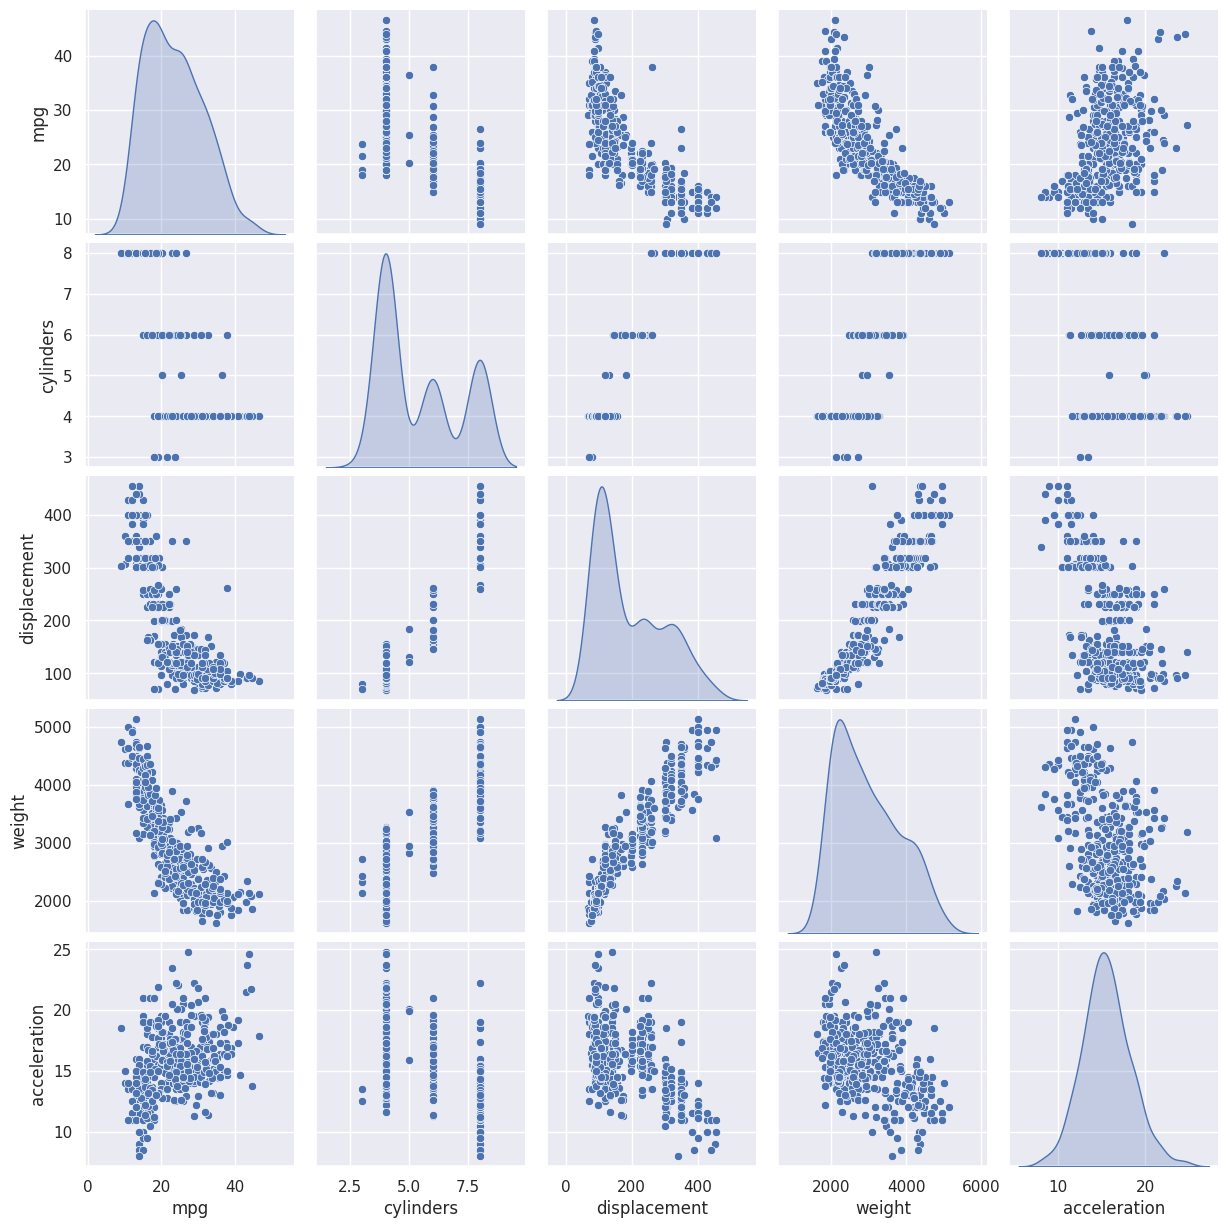

In [311]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight", "acceleration", "horsepower"]], diag_kind="kde")

In [312]:
train_dataset = df.drop("mpg", axis = 1).drop("car name", axis = 1).drop("origin", axis = 1)
train_dataset.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year
393,4,140.0,86,2790,15.6,82
394,4,97.0,52,2130,24.6,82
395,4,135.0,84,2295,11.6,82
396,4,120.0,79,2625,18.6,82
397,4,119.0,82,2720,19.4,82


In [313]:
target_dataset = df["mpg"]
target_dataset.tail()

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, dtype: float64

In [314]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train_dataset, target_dataset, test_size = 0.2, random_state = 0xCAFE)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(318, 6)
(318,)
(80, 6)
(80,)


In [315]:
train_input.describe()

,cylinders,displacement,weight,acceleration,model year
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.471698,194.237421,2970.918239,15.634906,75.792453
std,1.708436,105.599182,852.164907,2.781906,3.627924
min,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,4.000000,98.750000,2223.750000,13.925000,73.000000
50%,4.000000,146.000000,2861.500000,15.500000,76.000000
75%,8.000000,293.250000,3612.000000,17.300000,79.000000
max,8.000000,455.000000,5140.000000,24.600000,82.000000


In [325]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()           # you can use both
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [326]:
# The damn dumb StandardScaler() doesn't work to me with saying about string which doesn't exist, idiot!

print(train_scaled.shape)
print(test_scaled.shape)

(318, 6)
(80, 6)


In [327]:
from tensorflow import keras

def create_DNN_model(additional_layers = None):

    model = keras.Sequential()

    if additional_layers:
        for more_layer in additional_layers:
            model.add(more_layer)

    model.add(keras.layers.Dense(units = 1))

    return model

In [328]:
model = create_DNN_model([keras.layers.Dense(units = 64, activation = "relu", input_shape = (test_scaled.shape[1], )),
                          keras.layers.Dense(units = 32, activation = "relu"),
                          keras.layers.Dropout(0.3),
                          keras.layers.Dense(units = 16, activation = "relu"),
                         ])
model.summary()

print(test_scaled.shape[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                448       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
6


In [329]:
from tensorflow._api.v2.config import optimizer
model.compile(loss = "mse",                         # <-- REGRESSION
              metrics = "mae",
              optimizer = "adam")

from sklearn.utils import validation

early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True, mode = "auto")

history = model.fit(train_scaled, train_target,
                    epochs = 100,
                    validation_data = (test_scaled, test_target),
                    callbacks = [early_stopping_checkpoint])

Epoch 1/100
10/10 [==============================] - 4s 280ms/step - loss: 619.1802 - mae: 23.5766 - val_loss: 623.9644 - val_mae: 23.8775
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 608.5097 - mae: 23.3525 - val_loss: 615.6318 - val_mae: 23.6955
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 600.2130 - mae: 23.1608 - val_loss: 606.8354 - val_mae: 23.4916
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 590.4360 - mae: 22.9290 - val_loss: 593.1456 - val_mae: 23.1788
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 572.2454 - mae: 22.5022 - val_loss: 571.2137 - val_mae: 22.6784
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 544.5640 - mae: 21.8712 - val_loss: 534.2453 - val_mae: 21.8313
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 497.4332 - mae: 20.7774 - val_loss: 475.0241 - val_mae: 20.4177
Epoch 8/100
10/10 [===============

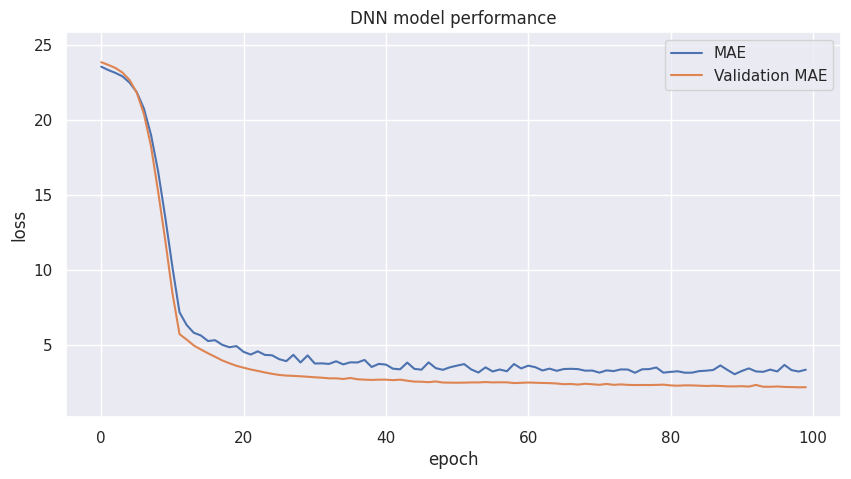

In [332]:
import matplotlib.pyplot as plt

plt.title("DNN model performance")

plt.plot(history.history["mae"], label = "MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")

plt.ylim([min(min(history.history["mae"]), min(history.history["val_mae"])) - 2, max(max(history.history["mae"]), max(history.history["val_mae"])) + 2])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

In [333]:
model.evaluate(test_scaled, test_target)

3/3 [==============================] - 1s 464ms/step - loss: 7.9308 - mae: 2.1742


[7.930824279785156, 2.174248218536377]

3/3 [==============================] - 0s 109ms/step


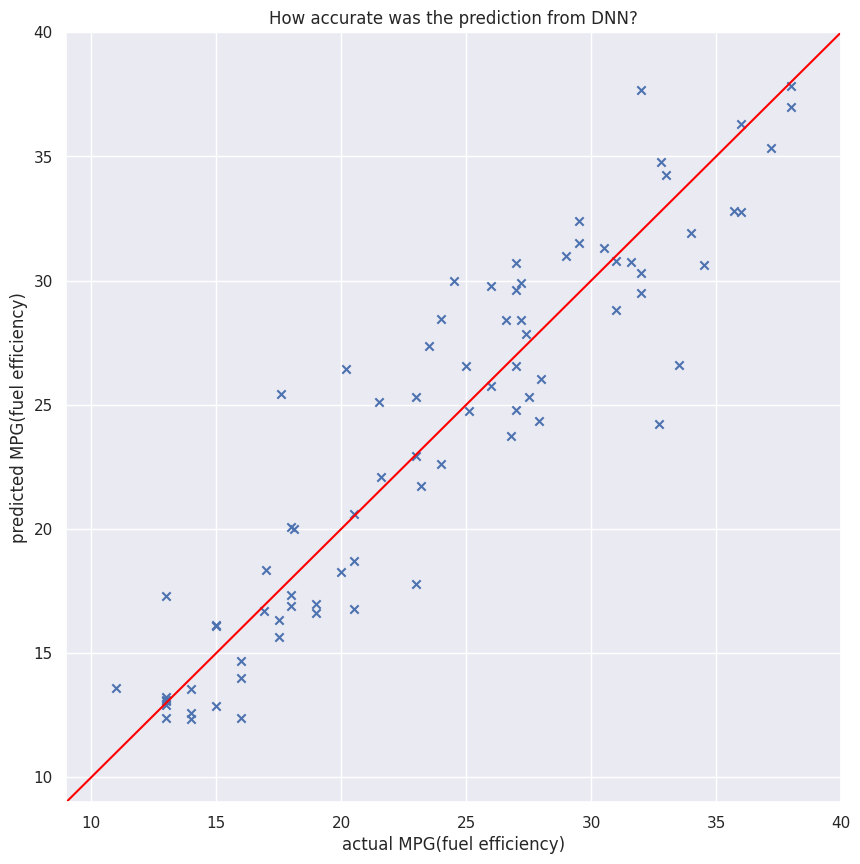

In [334]:
# Prediction Visualization
prediction = model.predict(test_scaled)

plt.figure(figsize = (10, 10))


plt.scatter(test_target, prediction, marker = "x")

plt.title("How accurate was the prediction from DNN?")
plt.xlabel("actual MPG(fuel efficiency)")
plt.ylabel("predicted MPG(fuel efficiency)")

# axis_range = [10000, 50000]2
axis_range = [min(min(test_target), min(prediction)) - 2, max(max(test_target), max(prediction)) + 2]
plt.plot(axis_range, axis_range, linestyle = "solid", color = "red")
plt.xlim(axis_range)
plt.ylim(axis_range)

plt.show()

# If the scattered plots more nearly approximates to the red diagonal line which represents the exact
# ratio of 1:1 for prediction:real, the model performed better.

In [ ]:
print